# SCP 

In [1]:
# packages
import numpy as np
import scipy.integrate as integrate
import scipy.optimize as opt
import matplotlib.pyplot as plt
import csv
import magic 

In [2]:
# read redshift and luminosity distance data from file
data_scp = np.genfromtxt('SCPUnion2.1_mu_vs_z.txt')
data = data_scp
with open('SCPUnion2.1_mu_vs_z.txt') as f:
    reader = csv.reader(f, delimiter="\t")
    d = list(reader)

redshift = data_scp.T[1]
dist_mod = data_scp.T[2] #pc
dist_mod_err = data_scp.T[3] #pc
lum_dist = 10**((dist_mod - 25)/5)
lum_dist_err = lum_dist * np.log(10) * dist_mod_err/5

### Fitting Model to Data (SCIPY)

In [3]:
omega_m, omega_lambda, H_0, omega_m_err, omega_lambda_err, H_0_err = magic.scipy_fit(redshift, lum_dist, lum_dist_err)   

In [4]:
print("Matter density: ", "{0:.3f}".format(omega_m), " ± ", "{0:.3f}".format(omega_m_err))
print("Dark energy density: ", "{0:.2f}".format(omega_lambda), " ± ", "{0:.2f}".format(omega_lambda_err))
print("Hubble constant: ", "{0:.2f}".format(H_0), " ± ", "{0:.2f}".format(H_0_err))

Matter density:  0.323  ±  0.069
Dark energy density:  0.75  ±  0.11
Hubble constant:  70.49  ±  0.43


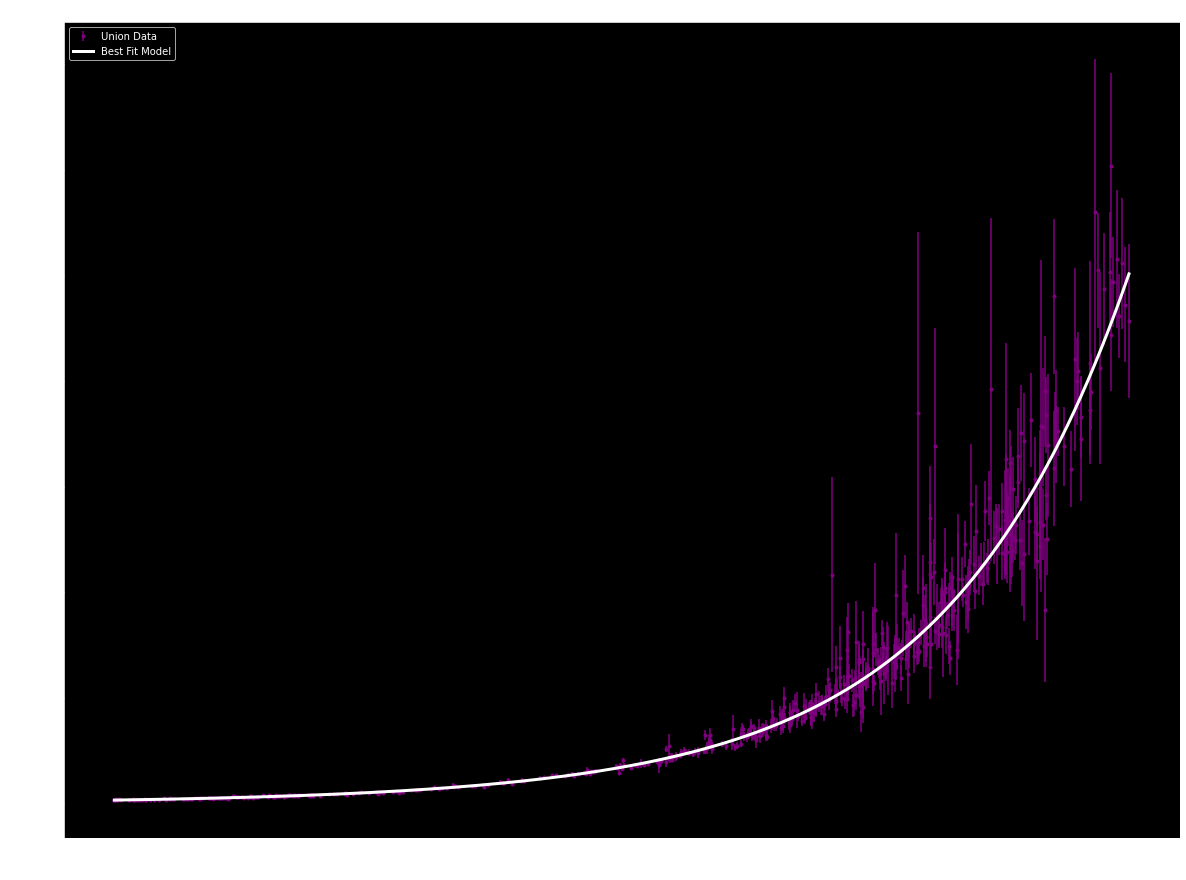

In [5]:
plt.rcParams.update({'font.size': 25})
magic.scipy_fit_plot(redshift, lum_dist, lum_dist_err, omega_m, omega_lambda, H_0)

## Phase Space Sampling


/Users/tanaybhadra/Documents/GitHub/c161_project/dex/magic.py:25: RuntimeWarning: invalid value encountered in sqrt
  return 1/np.sqrt((1+x)**2 * (1+omega_m*x) - x * (2+x) * omega_lambda)
/Users/tanaybhadra/Documents/GitHub/c161_project/dex/magic.py:26: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = integrate.quad(integrand,0,z)[0]


Matter density:  0.00
Dark energy density:  0.00
Hubble constant:  60.00


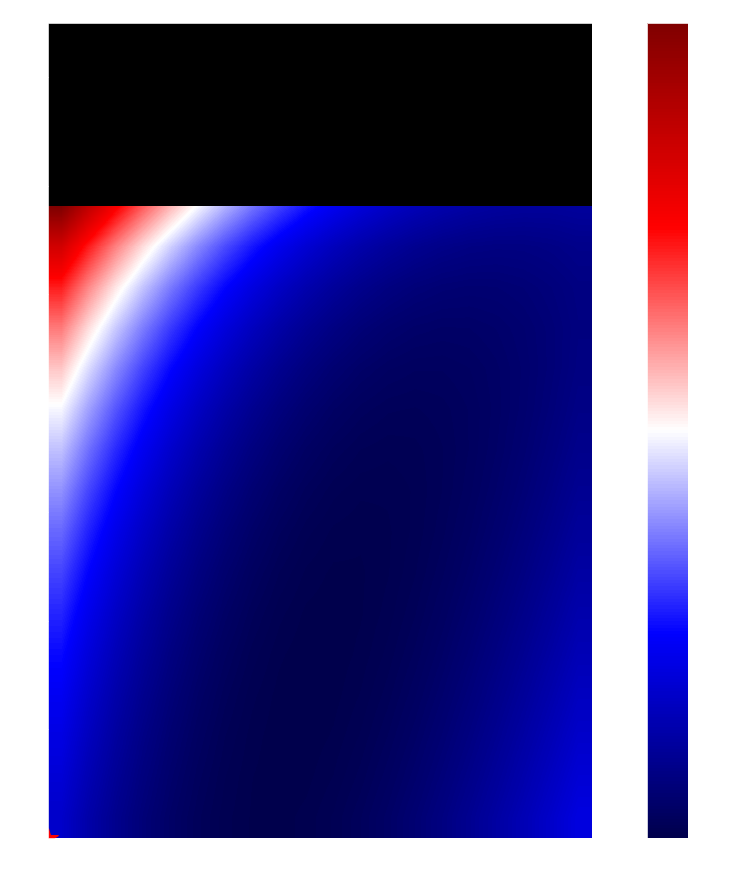

In [6]:
magic.phase_space_plots(redshift, omega_m, omega_lambda, H_0, lum_dist, lum_dist_err)

### Astropy Plots

magic.astropy_plots(H_0_best, omega_m_best)

# Scale Factor Stuff

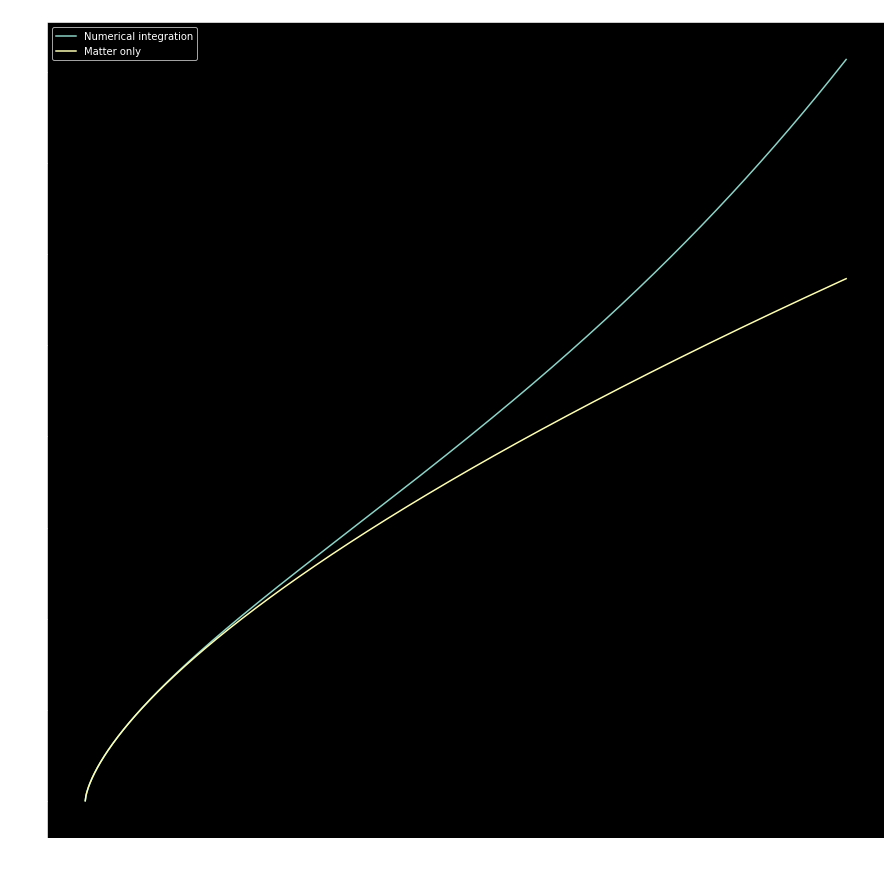

In [7]:
t_range = 0,20e9 # in units of t0
a0 = np.array([1e-15]) # pick some small but nonzero value
H_0_yrs = H_0 / 3.086e19 * 3.154e7 # convert H_0 to units of 1/years
adot = lambda time, a: H_0_yrs * np.sqrt(omega_m/a + omega_lambda * a**2)
rel_err_tolerance = 1e-5
t_eval = np.linspace(0,20e9,1000)

soln = integrate.solve_ivp(adot, t_range, a0, rtol=rel_err_tolerance, t_eval=t_eval)
times = soln.t
states = soln.y

exp = (3/2 * H_0_yrs * np.sqrt(omega_m) * times)**(2/3)
plt.figure(figsize = (15,15))

plt.plot(times, states[0], label='Numerical integration')
plt.plot(times, exp, label='Matter only')
plt.xlabel("Time (years)")
plt.ylabel("Scale factor $a(t)$")
plt.title("Matter- and Dark Energy-Dominated Universe")
plt.legend();

In [8]:
def a(t,omega_m,omega_lambda,H_0):
    num = omega_m**(1/3) * np.tanh(3/2 * H_0 * np.sqrt(omega_lambda) * t)**(2/3)
    den = (omega_lambda - omega_lambda * np.tanh(3/2 * H_0 * np.sqrt(omega_lambda) * t)**2)**(1/3)
    if den == 0:
        return 0
    return num/den

In [9]:
def a_helper(times,omega_m,omega_lambda,H_0):
    return [a(t,omega_m,omega_lambda,H_0) for t in times]


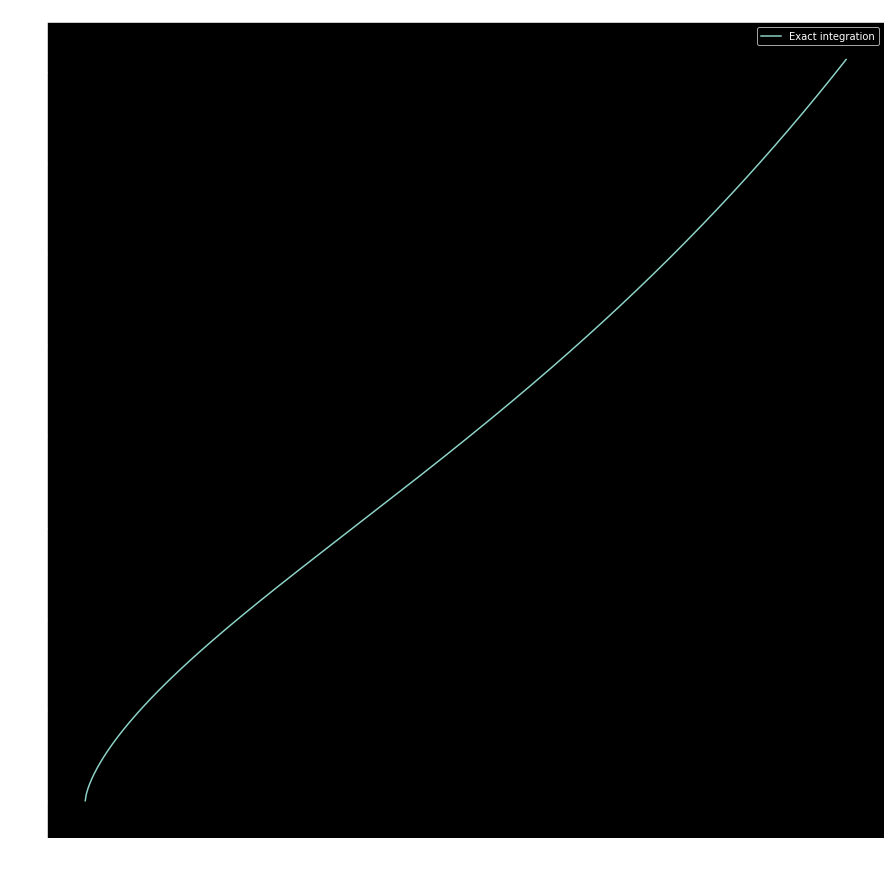

In [10]:
plt.figure(figsize = (15,15))

plt.plot(times, a_helper(times,omega_m,omega_lambda,H_0_yrs),label='Exact integration')
plt.xlabel("Time (years)")
plt.ylabel("Scale factor $a(t)$")
plt.title("Matter- and Dark Energy-Dominated Universe")
plt.legend();

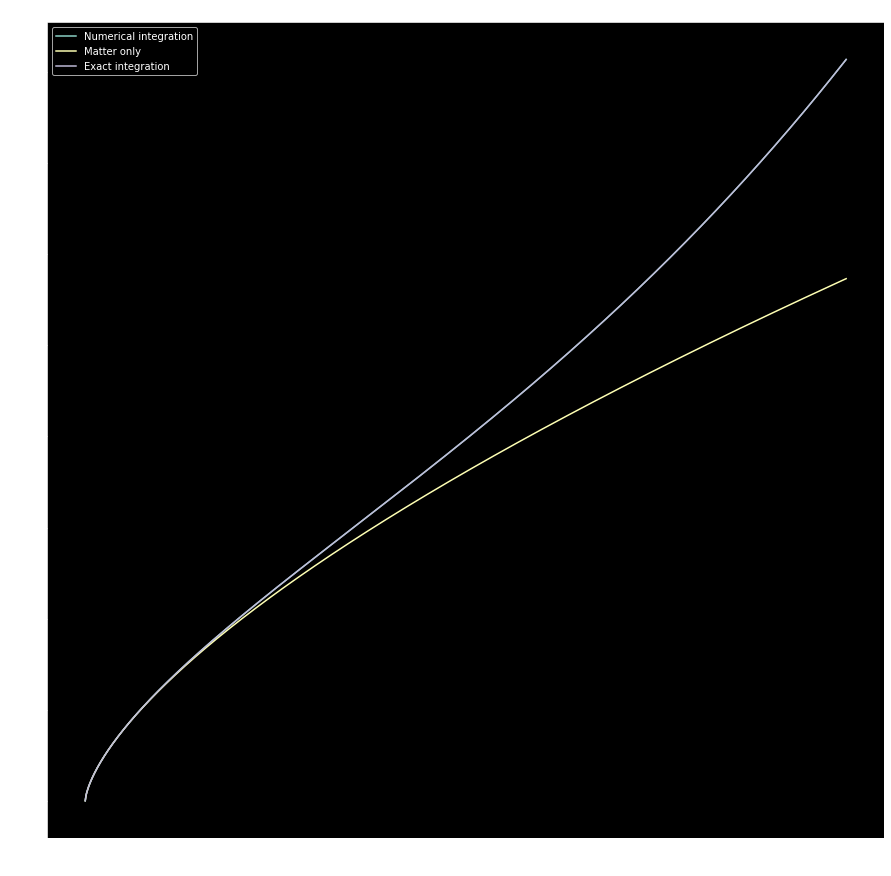

In [11]:
soln = integrate.solve_ivp(adot, t_range, a0, rtol=rel_err_tolerance, t_eval=t_eval)
times = soln.t
states = soln.y

exp = (3/2 * H_0_yrs * np.sqrt(omega_m) * times)**(2/3)
plt.figure(figsize = (15,15))

plt.plot(times, states[0], label='Numerical integration')
plt.plot(times, exp, label='Matter only')
plt.plot(times, a_helper(times,omega_m,omega_lambda,H_0_yrs),label='Exact integration')
plt.xlabel("Time (years)")
plt.ylabel("Scale factor $a(t)$")
plt.title("Matter- and Dark Energy-Dominated Universe")
plt.legend();

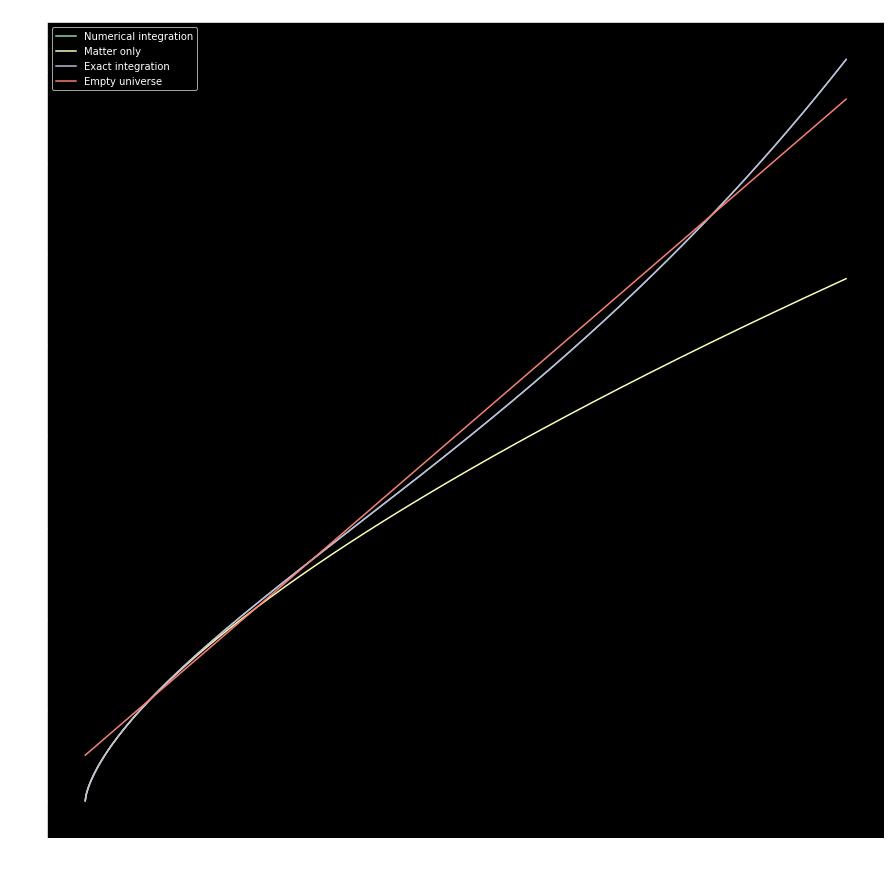

In [12]:
soln = integrate.solve_ivp(adot, t_range, a0, rtol=rel_err_tolerance, t_eval=t_eval)
times = soln.t
states = soln.y

exp = (3/2 * H_0_yrs * np.sqrt(omega_m) * times)**(2/3)

empty = H_0_yrs * times + 0.1
plt.figure(figsize = (15,15))

plt.plot(times, states[0], label='Numerical integration')
plt.plot(times, exp, label='Matter only')
plt.plot(times, a_helper(times,omega_m,omega_lambda,H_0_yrs),label='Exact integration')
plt.plot(times, empty, label='Empty universe')
plt.xlabel("Time (years)")
plt.ylabel("Scale factor $a(t)$")
plt.title("Matter- and Dark Energy-Dominated Universe")
plt.legend();

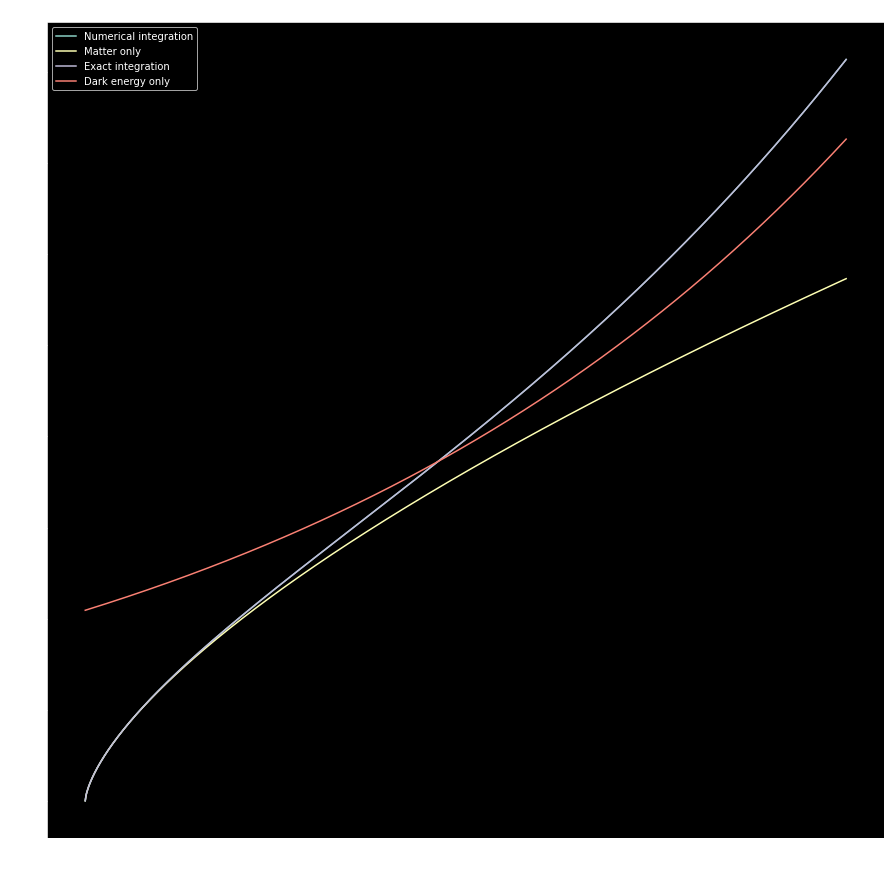

In [13]:
a0 = np.array([1e-15]) # pick some small but nonzero value
const = np.exp(-H_0_yrs * np.sqrt(omega_lambda) * 14 * 10**9)
soln = integrate.solve_ivp(adot, t_range, a0, rtol=rel_err_tolerance, t_eval=t_eval)
times = soln.t
states = soln.y

exp = (3/2 * H_0_yrs * np.sqrt(omega_m) * times)**(2/3)

de = np.exp(H_0_yrs * np.sqrt(omega_lambda) * (times-14*1e9))
plt.figure(figsize = (15,15))

plt.plot(times, states[0], label='Numerical integration')
plt.plot(times, exp, label='Matter only')
plt.plot(times, a_helper(times,omega_m,omega_lambda,H_0_yrs),label='Exact integration')
plt.plot(times, de, label='Dark energy only')
plt.xlabel("Time (years)")
plt.ylabel("Scale factor $a(t)$")
plt.title("Matter- and Dark Energy-Dominated Universe")
plt.legend();

## References
Ryden, B. Introduction to Cosmology. Addison Wesley, 2003.

Riess, A. G., et al. 1998, Astron. J., 116, 1009.